<a href="https://colab.research.google.com/github/ramiredh/RETO_MODULO6/blob/main/DS_C3_SC1_Dhamar_Ramirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **RETO**



1.   **Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados**
2.   **Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv**



In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

happiness=pd.read_csv ("/content/sample_data/Happiness_report.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035




3.	**A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.**



In [8]:
mexico=happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index(['Country or region'], inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073




4.   **Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto**



Text(6.595, 0, 'MEX')

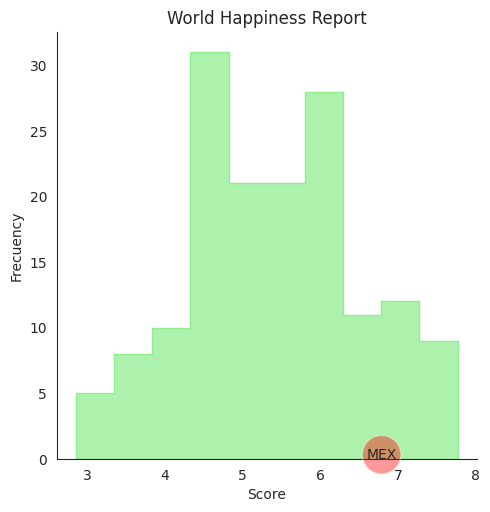

In [78]:
sns.displot(kind='hist',x='Score',data=happiness, element='step', bins=10, color='lightgreen')
sns.set_style('white')
plt.title('World Happiness Report')
plt.ylabel('Frecuency')

value = mexico['Score'].to_list()[0]

plt.text(value,0, 'MEX',bbox=dict(facecolor='red',boxstyle="circle", alpha=0.4,pad=0.3))



5.	**Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación**



Text(1.2, 0.861, 'MEX')

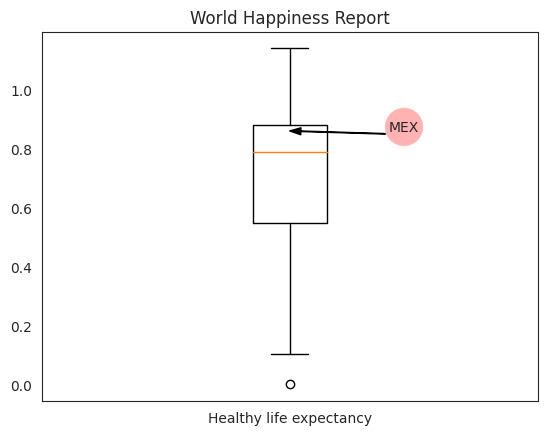

In [79]:
plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'])
plt.title('World Happiness Report')

value2 = mexico['Healthy life expectancy'].to_list()[0]

props_arrow = {'color':'black',                                            #crear diccionario con propiedades de la flecha
 'width':0.4,
 'headwidth':5,
 'headlength':8}

text={'facecolor':'red',                                                  #crear diccionario con propiedades del texto
       'boxstyle':"circle",
       'alpha':0.3,
       'pad':0.3}

plt.annotate('MEX', xy=(1,value2),xytext=(1.2,value2),bbox=text, arrowprops=props_arrow)



6.   **Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.** Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente



In [207]:
mexico2=happiness.loc[happiness['Country or region']=='Mexico']
mexico2=mexico2.drop(['Overall rank', 'Country or region', 'Score'], axis=1)
mexico2=mexico2.T
mexico2=mexico2.reset_index()
mexico2=mexico2.rename(columns={'index':'Factors', 22:'Mexico'})
mexico2.set_index(['Factors'], inplace=True)
mexico2

,Mexico
Factors,
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


Text(0.5, 1.0, 'Contribution in Mexico happiness score')

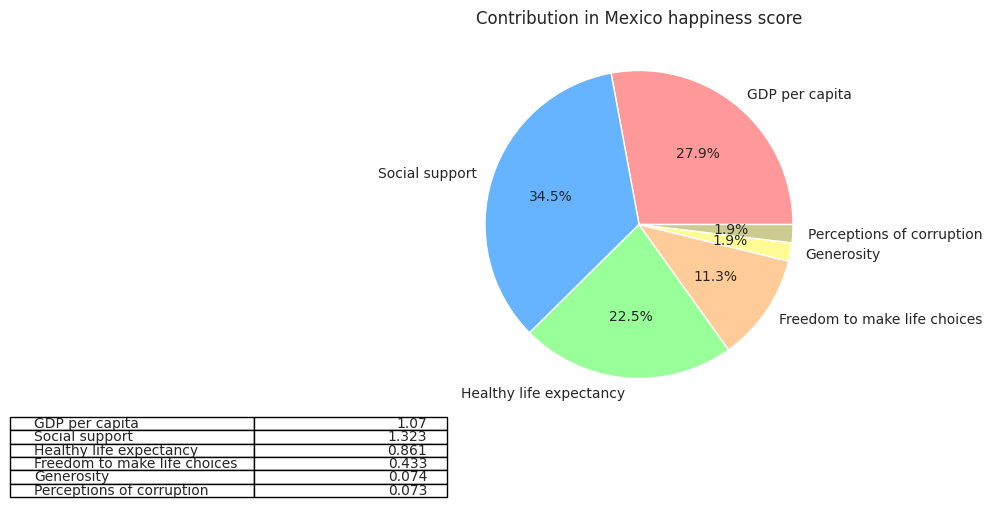

In [209]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc96', '#cccc90']
mexico2.plot.pie(y='Mexico',labels=mexico2.index,autopct='%1.1f%%', ylabel='', legend='', figsize=(5,5), colors=colors)
a=plt.table(cellText=mexico2.values, rowLabels=mexico2.index, loc='bottom left')
a.scale(0.5, 0.8)
plt.title('Contribution in Mexico happiness score')

7.	**Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores**

In [255]:
#Hay que reestructurar dataframe para que el las filas tengan los factores que serán el eje x

mexico3=happiness.loc[(happiness['Country or region']=='Mexico')|(happiness['Country or region']=='Finland')|(happiness['Country or region']=='Iceland')|(happiness['Country or region']=='South Sudan')
|(happiness['Country or region']=='Canada')]
mexico3=mexico3.drop(['Overall rank', 'Score','Country or region'], axis=1)
mexico3=mexico3.T
mexico3=mexico3.reset_index()
mexico3=mexico3.rename(columns={'index':'Factors', 0:'Finland', 3:'Iceland', 8:'Canada', 22:'Mexico',155:'South Sudan'})
mexico3.set_index(['Factors'], inplace=True)

mexico3

,Finland,Iceland,Canada,Mexico,South Sudan
Factors,,,,,
GDP per capita,1.340,1.380,1.365,1.070,0.306
Social support,1.587,1.624,1.505,1.323,0.575
Healthy life expectancy,0.986,1.026,1.039,0.861,0.295
Freedom to make life choices,0.596,0.591,0.584,0.433,0.010
Generosity,0.153,0.354,0.285,0.074,0.202
Perceptions of corruption,0.393,0.118,0.308,0.073,0.091


Text(0.5, 1.0, 'World Happiness Report')

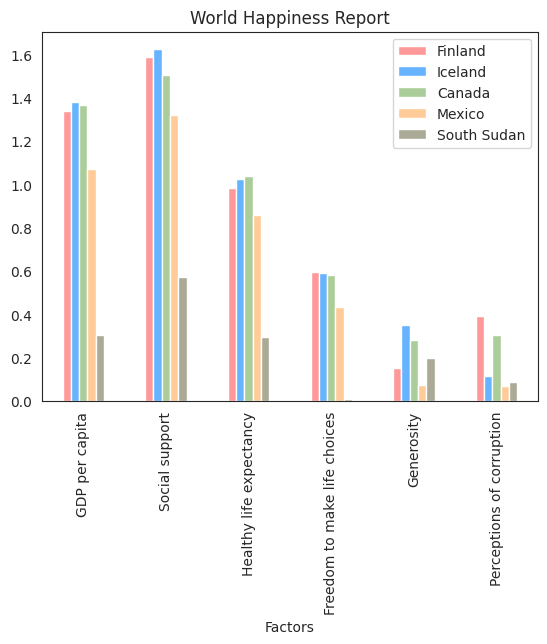

In [264]:
colors2 = ['#ff9999','#66b3ff','#abcd99','#ffcc99','#aaaa96']
mexico3.plot.bar(color=colors2)
plt.xticks(rotation=90)
plt.title('World Happiness Report')

8.	**Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.**Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

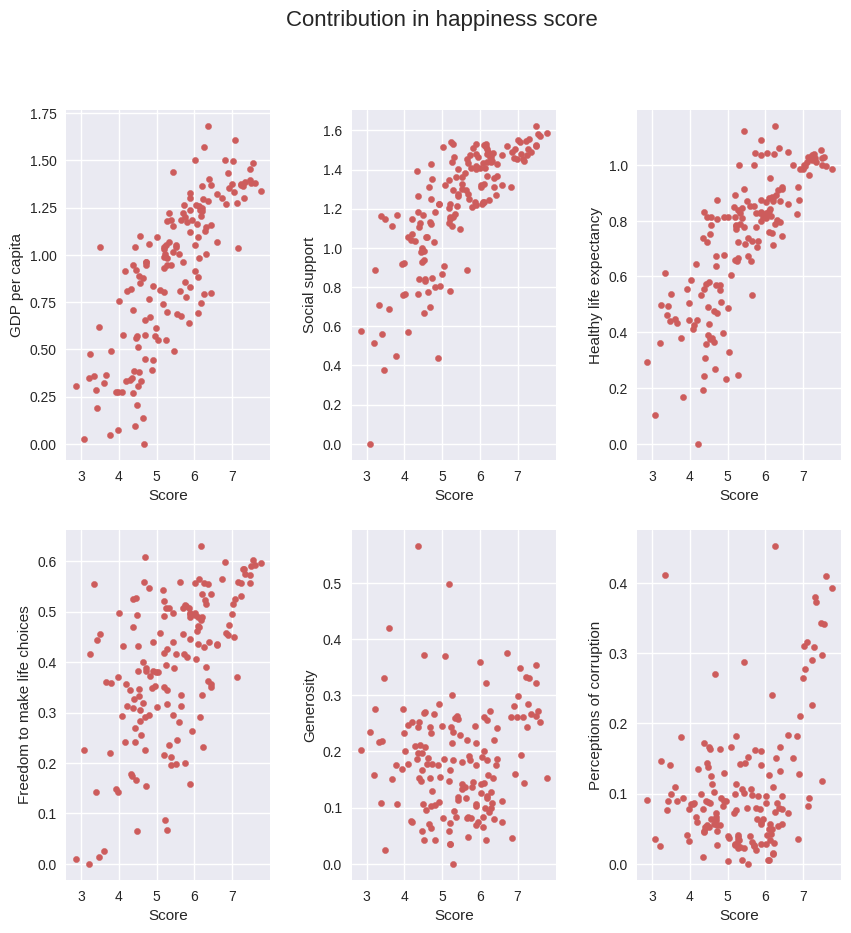

In [292]:
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Contribution in happiness score', fontsize=16)

ax1 = fig.add_subplot(231)
happiness.plot(kind='scatter',x='Score',y='GDP per capita',color='indianred',ax=ax1)                        #ax=ax1            importante ponerlo porque si no sale la gráfica de abajo vacía |
ax1.set_xticks(np.arange(3,8,1))

ax2 = fig.add_subplot(232)
happiness.plot(kind='scatter',x='Score',y='Social support',color='indianred',ax=ax2)                        #ax=ax1            importante ponerlo porque si no sale la gráfica de abajo vacía |
ax2.set_xticks(np.arange(3,8,1))

ax3 = fig.add_subplot(233)
happiness.plot(kind='scatter',x='Score',y='Healthy life expectancy',color='indianred',ax=ax3)                        #ax=ax1            importante ponerlo porque si no sale la gráfica de abajo vacía |
ax3.set_xticks(np.arange(3,8,1))

ax4 = fig.add_subplot(234)
happiness.plot(kind='scatter',x='Score',y='Freedom to make life choices',color='indianred',ax=ax4)                        #ax=ax1            importante ponerlo porque si no sale la gráfica de abajo vacía |
ax4.set_xticks(np.arange(3,8,1))

ax5 = fig.add_subplot(235)
happiness.plot(kind='scatter',x='Score',y='Generosity',color='indianred',ax=ax5)                        #ax=ax1            importante ponerlo porque si no sale la gráfica de abajo vacía |
ax5.set_xticks(np.arange(3,8,1))

ax6 = fig.add_subplot(236)
happiness.plot(kind='scatter',x='Score',y='Perceptions of corruption',color='indianred',ax=ax6)                        #ax=ax1            importante ponerlo porque si no sale la gráfica de abajo vacía |
ax6.set_xticks(np.arange(3,8,1))

**HEATMAP**

In [300]:
#PRIMERO CREAMOS EL DF CON LA ESTRUCTURA CORRECTA
map=happiness.drop(['Country or region'], axis=1)
map

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<Axes: >

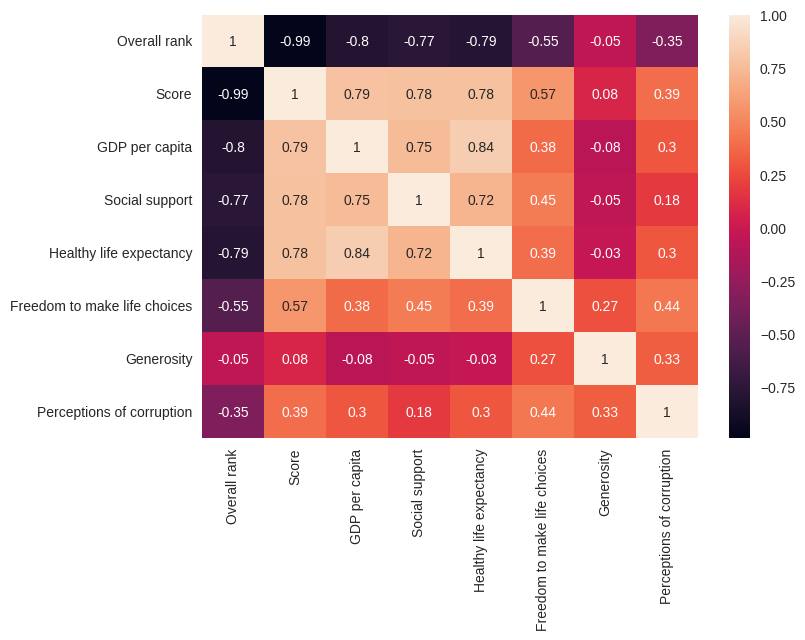

In [301]:
sns.heatmap(round(map.corr(),2),annot=True)

9.	**Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.**

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

metada=pd.read_csv ("/content/sample_data/Metadata.csv")
metada

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


In [304]:
result = pd.merge(happiness, metada, left_on="Country or region", right_on="TableName")
result

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,DNK,Europe & Central Asia,High income,NaN,Denmark
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NOR,Europe & Central Asia,High income,NaN,Norway
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,ISL,Europe & Central Asia,High income,NaN,Iceland
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,RWA,Sub-Saharan Africa,Low income,NaN,Rwanda
132,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,TZA,Sub-Saharan Africa,Lower middle income,NaN,Tanzania
133,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,AFG,South Asia,Low income,NaN,Afghanistan
134,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,CAF,Sub-Saharan Africa,Low income,NaN,Central African Republic


Text(0.5, 1.0, 'World Happiness Report')

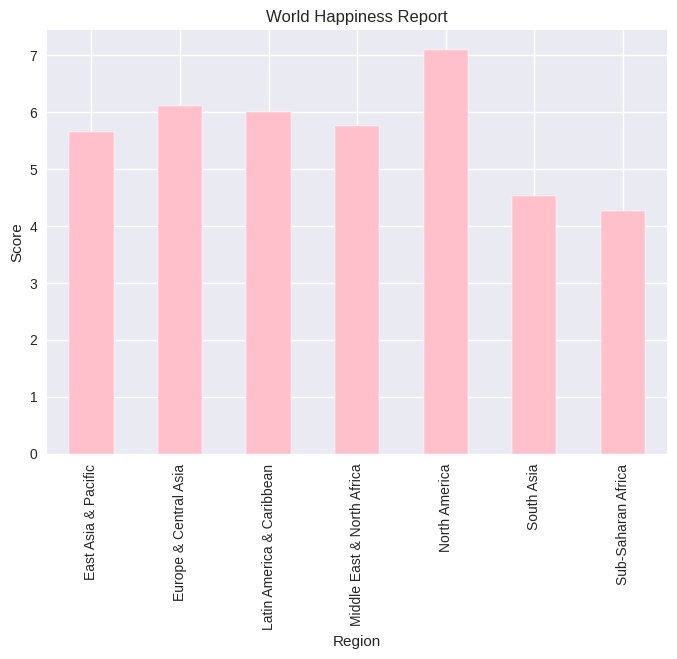

In [317]:
result2=result[['Region', 'Score']].groupby("Region").mean()
result2.plot.bar(legend='', ylabel='Score', color='pink')
plt.title('World Happiness Report')